**Ajmal_Assignment2**

In [9]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [35]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

1.a. start with creating a visualization of your input data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


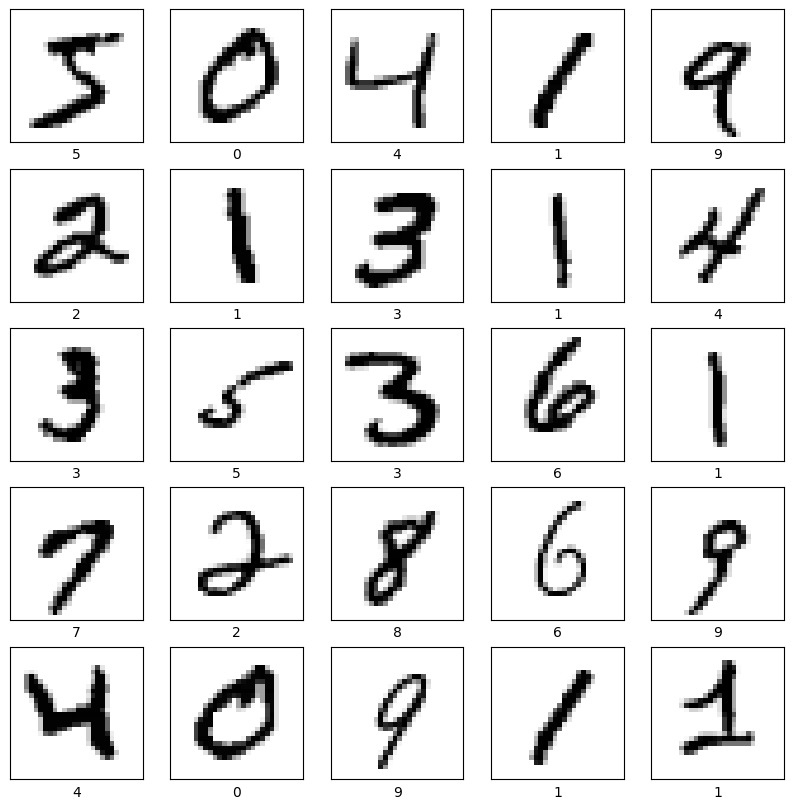

In [3]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [36]:
# You need to apply some preprocessing on X and y

# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode outputs
# This code has been moved to the data loading cell (U2TWWBPaPH0D)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# num_classes = y_test.shape[1]

1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [31]:
#1.b.
# Create model here
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization # Import BatchNormalization

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(data_format='channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(data_format='channels_last'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(data_format='channels_last')) # Added MaxPooling2D here
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Conclusion

Summarize your findings from the experiments with different models and techniques (data augmentation, dropout, pre-trained models) on both MNIST and CIFAR-10 datasets. Discuss the learning curves, accuracy, and any observations about overfitting or underfitting.

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9312 - loss: 0.2222 - val_accuracy: 0.9378 - val_loss: 0.1960
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.9781 - val_loss: 0.0678
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9843 - val_loss: 0.0487
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9890 - val_loss: 0.0351
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9829 - val_loss: 0.0513
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9953 - loss: 0.0131 - val_accuracy: 0.9893 - val_loss: 0.0350
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9868 - val_loss: 0.0420
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 

In [38]:
# Measure test accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.88%


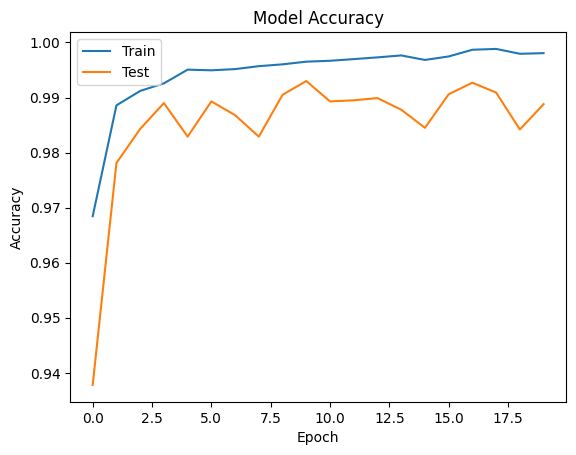

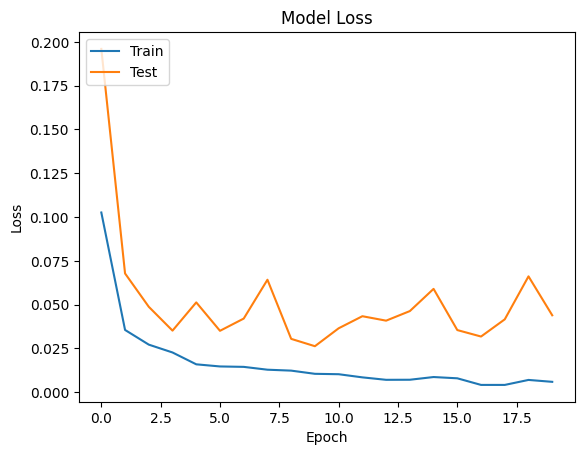

In [39]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


learning_curve(hist)

In [ ]:
## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about

**Part 2- CIFAR10**

In [40]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


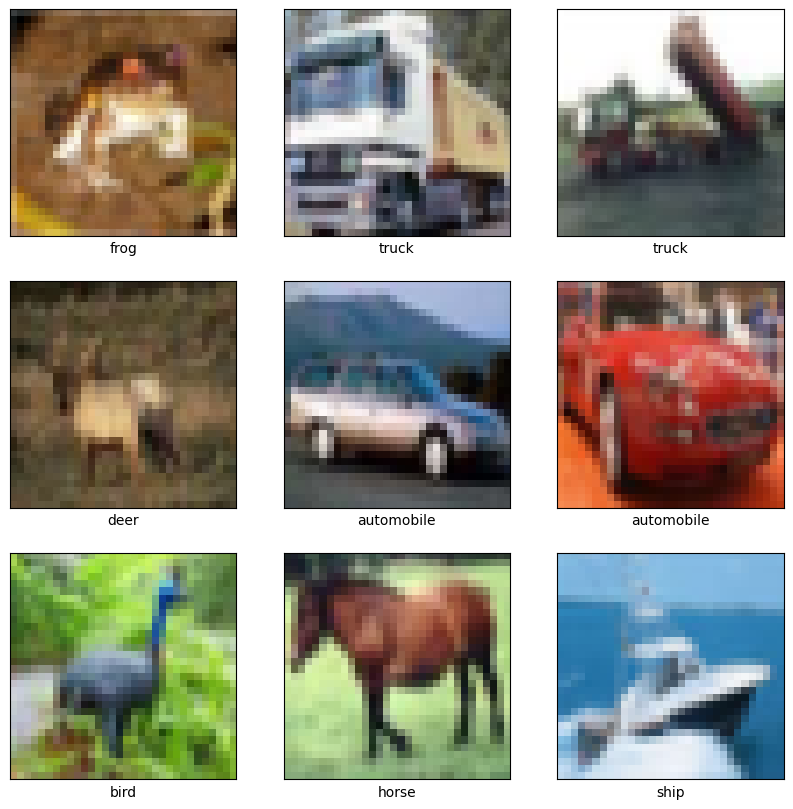

In [41]:
# 2.a. Let's look into the dataset by visualizing some data opints
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [42]:
# 2.b
# Encoding output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# create data generator
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=128)


# Create model here
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile model
hist = model.fit(it_train, steps_per_epoch=len(it_train), epochs=20, validation_data=(X_test, y_test))# start training

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.4628 - loss: 1.5865 - val_accuracy: 0.6218 - val_loss: 1.1758
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6818 - loss: 0.9039 - val_accuracy: 0.6614 - val_loss: 1.0393
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.7380 - loss: 0.7468 - val_accuracy: 0.7139 - val_loss: 0.8339
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7772 - loss: 0.6352 - val_accuracy: 0.7231 - val_loss: 0.8213
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.8025 - loss: 0.5655 - val_accuracy: 0.7414 - val_loss: 0.7912
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8304 - loss: 0.4806 - val_accuracy: 0.7781 - val_loss: 0.6784
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.8436 - loss: 0.4442 - val_accuracy: 0.7899 - val_loss: 0.6357
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.8589 - loss: 0.4034 - 

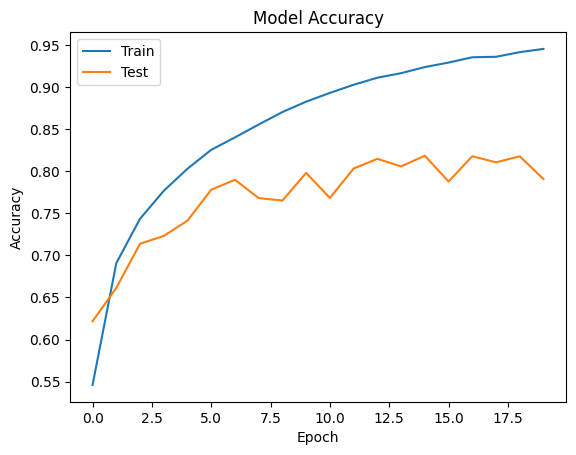

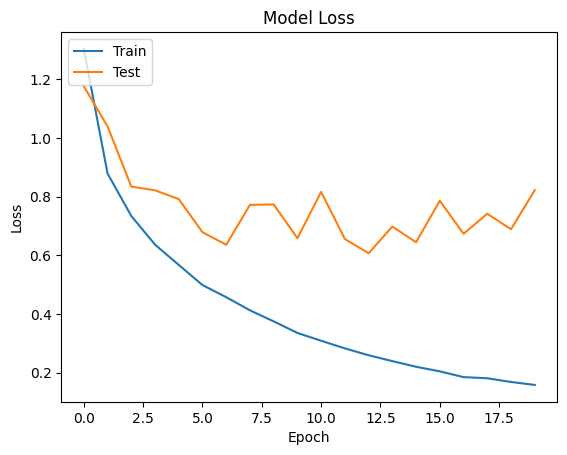

In [43]:
# Draw learning curve here
learning_curve(hist)

In [53]:
# What is the issue and possible solution for this learning curve?
# Based on the learning curve you observed after training the model on augmented CIFAR-10 data without dropout, the likely issue is overfitting. This is typically seen when the training accuracy continues to improve, but the validation accuracy plateaus or even decreases, and the validation loss starts to increase.
# A common solution to address overfitting in neural networks is to use Dropout. Dropout randomly sets a fraction of the input units to 0 at each training step, which helps prevent the network from relying too heavily on specific neurons and encourages it to learn more robust features.

In [44]:
#2.c. Solution to resolve overfitting
# One solution is adding drop out
# Implement your solution here and train model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) # Added Dropout

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) # Added Dropout

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # Added Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # Added Dropout
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile model
hist = model.fit(it_train, steps_per_epoch=len(it_train), epochs=20, validation_data=(X_test, y_test))# start training

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.3167 - loss: 2.2101 - val_accuracy: 0.5107 - val_loss: 1.4222
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5284 - loss: 1.3302 - val_accuracy: 0.5800 - val_loss: 1.2015
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6151 - loss: 1.0928 - val_accuracy: 0.6363 - val_loss: 1.0725
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.6584 - loss: 0.9734 - val_accuracy: 0.6975 - val_loss: 0.8505
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6784 - loss: 0.9135 - val_accuracy: 0.6754 - val_loss: 0.9806
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.7068 - loss: 0.8405 - val_accuracy: 0.6683 - val_loss: 0.9875
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.7200 - loss: 0.7946 - val_accuracy: 0.7319 - val_loss: 0.7819
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.7364 - loss: 0.7572 - 

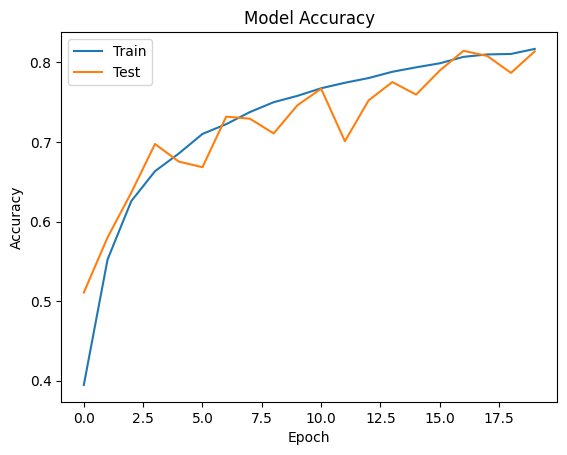

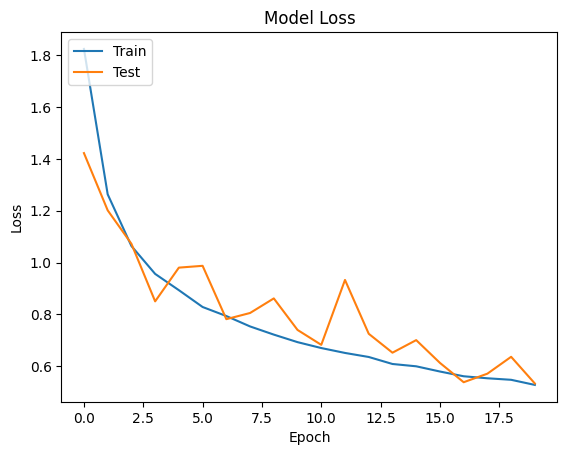

In [45]:
# Draw learning curve
learning_curve(hist)

In [46]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a new top layer
x = vgg_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=x)

# Freeze the layers of the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #Compile VGG16 model
hist = model.fit(it_train, steps_per_epoch=len(it_train), epochs=20, validation_data=(X_test, y_test))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.4166 - loss: 1.9411 - val_accuracy: 0.5991 - val_loss: 1.1821
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5432 - loss: 1.3226 - val_accuracy: 0.6121 - val_loss: 1.1341
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5698 - loss: 1.2374 - val_accuracy: 0.6069 - val_loss: 1.1334
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5781 - loss: 1.2122 - val_accuracy: 0.6255 - val_loss: 1.0896
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5892 - loss: 1.1829 - val_accuracy: 0.6264 - val_loss: 1.0935
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5996 - loss: 1.1523 - val_accuracy: 0.6377 - val_loss: 1.0624
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6034 - loss: 1.1371 - val_accuracy: 0.6303 - val_loss: 1.0839
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━

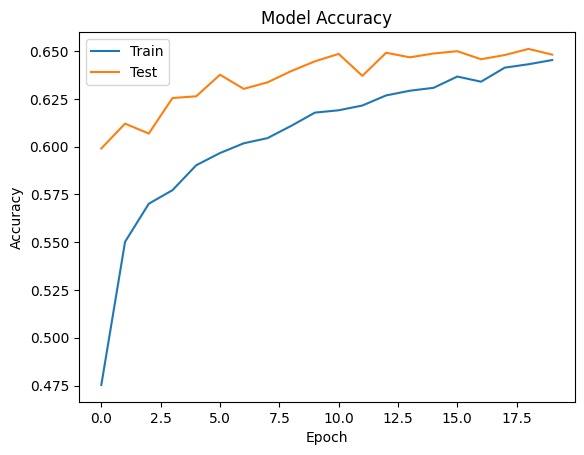

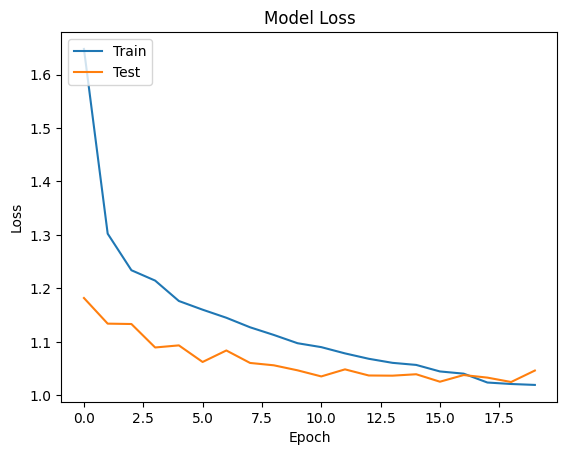

In [47]:
learning_curve(hist)

In [52]:
model.evaluate(X_test, y_test, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6399 - loss: 1.0375


[1.0357760190963745, 0.6456999778747559]

In [49]:
# This is my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a new top layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
hist= model.fit(it_train, steps_per_epoch=len(it_train), epochs=20, validation_data=(X_test, y_test))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 106ms/step - accuracy: 0.4409 - loss: 1.8291 - val_accuracy: 0.5927 - val_loss: 1.1882
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5481 - loss: 1.3011 - val_accuracy: 0.6072 - val_loss: 1.1334
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.5798 - loss: 1.2052 - val_accuracy: 0.6145 - val_loss: 1.0939
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5938 - loss: 1.1735 - val_accuracy: 0.6176 - val_loss: 1.1054
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.5943 - loss: 1.1557 - val_accuracy: 0.6288 - val_loss: 1.0692
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.6029 - loss: 1.1323 - val_accuracy: 0.6200 - val_loss: 1.0983
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.6108 - loss: 1.1223 - val_accuracy: 0.6365 - val_loss: 1.0472
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━

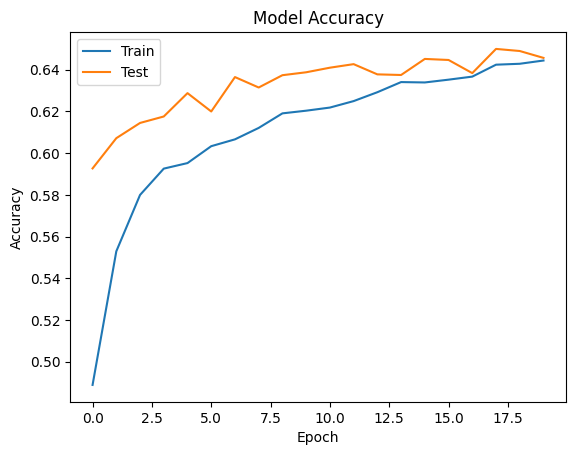

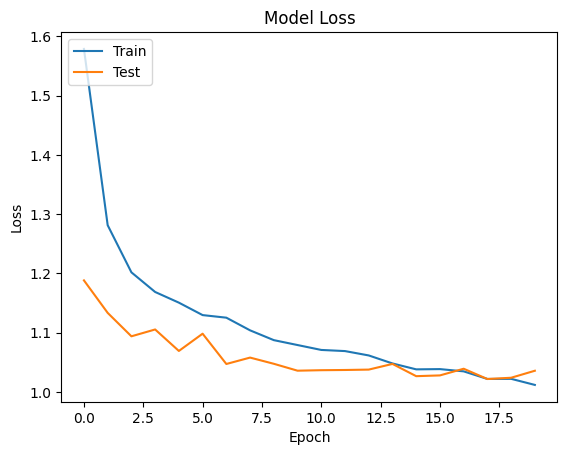

In [51]:
learning_curve(hist)